### Introduction
I was given this data set for performing exploratory data analysis. Basically, I had to participate in an inter-interns exploratory data analysis competition during my internship at Analytics Vidhya. The problem statement of the competition was as follows-
### Problem Statement
Welcome to Fintro! Fintro is a Financial Distribution company. Over the last 10 years, they have created an offline distribution channel across India. They sell Financial products to consumers by hiring agents in their network. These agents are freelancers and get commission when they make a product sale.

### Overview of Fintro On-boarding process
The Managers at Fintro are primarily responsible for recruiting agents. Once a manager has identified a potential applicant, the would explain the business opportunity to the agent. Once the agent provides the consent, an application is made to Fintro to become an agent. This date is known as application_receipt_date.
In the next 3 months, this potential agent has to undergo a 7 day training at the Fintro branch (about Sales processes and various products) and clear a subsequent examination in order to become a Fintro agent.

### The problem - Who are the best agents?
As is obvious in the above process, there is a significant investment which Fintro makes in identifying, training and recruiting these agents. However, there are a set of agents who do not bring in the expected resultant business.
Fintro is looking for help from data scientists like you to help them provide insigths using their past recruitment data. They want to predict the target variable for each potential agent, which would help them identify the right agents to hire.

### Key Points:
•	It has data for period Apr'2007 to Jan'2009 (For Jan'09 only 99 records for 01-Jan-09)
•	The training data for period Apr'2007 to 01-Jul-2008
•	Public leaderboard is based on First 2 months of the test dataset (02-Jul-2008 and 01-Sep-2008) and rest of test dataset is used for Private leaderboard
•	You are expected to upload the solution in the format of "sample_submission.csv".
### Data
Variable	Definition

ID	Unique Application ID

Office_PIN	-PINCODE of Fintro's Offices

Application_Receipt_Date-	Date of Application

Applicant_City_PIN	-PINCODE of Applicant Address

Applicant_Gender-	Applicant's Gender

Applicant_BirthDate	-Applicant's Birthdate

Applicant_Marital_Status-	Applicant's Marital Status

Applicant_Occupation	-Applicant's Occupation

Applicant_Qualification	-Applicant's Educational Qualification

Manager_DOJ	-Manager's Date of Joining

Manager_Joining_Designation	-Manager's Joining Designation in Fintro

Manager_Current_Designation-	Manager's Designation at the time of application sourcing

Manager_Grade	-Manager's Grade in Fintro

Manager_Status-	Current Employment Status (Probation / Confirmation)

Manager_Gender-	Manager's Gender

Manager_DoB-	Manager's Birthdate

Manager_Num_Application-	No. of Applications sourced in last 3 months by the Manager

Manager_Num_Coded-	No. of agents recruited by the manager in last 3 months

Manager_Business	-Amount of business sourced by the manager in last 3 months

Manager_Num_Products-	Number of products sold by the manager in last 3 months

Manager_Business2	-Amount of business sourced by the manager in last 3 months excluding business from their Category A advisor

Manager_Num_Products2	-Number of products sold by the manager in last 3 months excluding business from their Category A advisor

Business_Sourced(Target)-	Business sourced by applicant within 3 months [1/0] of recruitment



In [1]:
# Doing standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

In [2]:
# Reading the data set
df = pd.read_csv("C:/Users/HP/Documents/AV interns/Hackathon datasets/fintro/Train_pjb2QcD.csv")

In [3]:
# Taking a look at the occupation of the occupants
df_series = df['Applicant_Occupation']

In [4]:
df_series

0              Others
1              Others
2            Business
3            Salaried
4              Others
5              Others
6            Business
7            Salaried
8            Business
9              Others
10           Salaried
11           Business
12           Business
13           Business
14             Others
15             Others
16           Salaried
17           Business
18             Others
19           Salaried
20           Business
21             Others
22           Business
23           Business
24           Business
25           Salaried
26           Salaried
27           Business
28           Business
29           Salaried
            ...      
9497         Salaried
9498         Salaried
9499         Salaried
9500           Others
9501         Salaried
9502              NaN
9503              NaN
9504              NaN
9505              NaN
9506    Self Employed
9507           Others
9508         Salaried
9509           Others
9510         Salaried
9511      

In [5]:
# Getting introduced to data set
df

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,4/16/2007,844120.0,M,12/19/1971,M,Others,Graduate,11/10/2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,4/16/2007,844111.0,M,2/17/1983,S,Others,Class XII,11/10/2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,4/16/2007,844101.0,M,1/16/1966,M,Business,Class XII,5/27/2006,...,Confirmation,M,3/3/1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,FIN1000004,814112,4/16/2007,814112.0,M,2/3/1988,S,Salaried,Class XII,8/21/2003,...,Confirmation,F,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,FIN1000005,814112,4/16/2007,815351.0,M,7/4/1985,M,Others,Class XII,5/8/2006,...,Confirmation,M,2/7/1971,2.0,1.0,230402.0,17.0,230402.0,17.0,0
5,FIN1000006,814112,4/16/2007,814114.0,M,3/23/1988,S,Others,Class XII,1/17/2006,...,Confirmation,M,2/20/1979,0.0,0.0,247118.0,24.0,247118.0,24.0,1
6,FIN1000007,842001,4/16/2007,844118.0,M,2/5/1969,M,Business,Class XII,9/1/2003,...,Confirmation,M,5/28/1969,0.0,0.0,315119.0,27.0,315119.0,27.0,1
7,FIN1000008,800001,4/16/2007,844103.0,M,1/28/1984,M,Salaried,Class XII,12/16/2006,...,Confirmation,M,1/7/1976,5.0,4.0,117358.0,9.0,117358.0,9.0,0
8,FIN1000009,209625,4/16/2007,206451.0,M,1/8/1976,M,Business,Graduate,11/18/2004,...,Confirmation,M,3/7/1966,0.0,0.0,244028.0,17.0,244028.0,17.0,1
9,FIN1000010,211001,4/16/2007,212218.0,M,2/3/1982,M,Others,Class XII,8/15/2002,...,Confirmation,M,11/14/1974,0.0,0.0,851557.0,39.0,851557.0,39.0,1


#### Office PIN is an indicator of the geographical location of the office. Different geographical location have different literacy rate, education standards and social norms. Keeping this fact in mind, let's see whether geographical location really matters or not.

In [6]:
df['Business_Sourced'].groupby(by=df.Office_PIN).sum()

Office_PIN
110005     37
110034      0
121002     74
122002     25
124001      0
125001     20
141001     32
143001      2
144001      0
160017     24
171006     41
180012     30
201001     31
201010     22
201301     52
202001     44
208001     36
209625     44
211001    107
221010     67
224001     23
224122     34
226001     41
230001     36
233001     32
250001     45
271201     27
273001     36
274001     28
277001     59
         ... 
600017     60
620018      1
625016      0
636004      0
641018      2
680001     64
686004     33
691008     26
695014    148
700016     65
713216     34
713303     46
751009     41
753012     30
781005     29
800001     40
802101     18
802301     15
803101     41
812001      8
814112     25
824101     22
826001      0
834001     54
841226     23
841428     24
842001     65
843302     43
848101     24
851101     34
Name: Business_Sourced, Length: 98, dtype: int64

#### Creating a dummy column to use later

In [7]:
dummy1_list = []

In [8]:
for i in range(0,9527):
    dummy1_list.append(1)

In [9]:
df['dummy1'] = pd.Series(dummy1_list)

In [10]:
df.shape

(9527, 24)

In [11]:
df

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced,dummy1
0,FIN1000001,842001,4/16/2007,844120.0,M,12/19/1971,M,Others,Graduate,11/10/2005,...,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0,1
1,FIN1000002,842001,4/16/2007,844111.0,M,2/17/1983,S,Others,Class XII,11/10/2005,...,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1,1
2,FIN1000003,800001,4/16/2007,844101.0,M,1/16/1966,M,Business,Class XII,5/27/2006,...,M,3/3/1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0,1
3,FIN1000004,814112,4/16/2007,814112.0,M,2/3/1988,S,Salaried,Class XII,8/21/2003,...,F,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0,1
4,FIN1000005,814112,4/16/2007,815351.0,M,7/4/1985,M,Others,Class XII,5/8/2006,...,M,2/7/1971,2.0,1.0,230402.0,17.0,230402.0,17.0,0,1
5,FIN1000006,814112,4/16/2007,814114.0,M,3/23/1988,S,Others,Class XII,1/17/2006,...,M,2/20/1979,0.0,0.0,247118.0,24.0,247118.0,24.0,1,1
6,FIN1000007,842001,4/16/2007,844118.0,M,2/5/1969,M,Business,Class XII,9/1/2003,...,M,5/28/1969,0.0,0.0,315119.0,27.0,315119.0,27.0,1,1
7,FIN1000008,800001,4/16/2007,844103.0,M,1/28/1984,M,Salaried,Class XII,12/16/2006,...,M,1/7/1976,5.0,4.0,117358.0,9.0,117358.0,9.0,0,1
8,FIN1000009,209625,4/16/2007,206451.0,M,1/8/1976,M,Business,Graduate,11/18/2004,...,M,3/7/1966,0.0,0.0,244028.0,17.0,244028.0,17.0,1,1
9,FIN1000010,211001,4/16/2007,212218.0,M,2/3/1982,M,Others,Class XII,8/15/2002,...,M,11/14/1974,0.0,0.0,851557.0,39.0,851557.0,39.0,1,1


#### Finding the conversion rate according to office pin i.e. geographical location.
Conversion rate is the ratio of number of applicants who sourced business and total number of applicants.

In [12]:
ser1 = df['Business_Sourced'].groupby(by=df.Office_PIN).sum()

In [13]:

ser2 = df['dummy1'].groupby(by=df.Office_PIN).sum()

In [14]:
#how many applicants are converted per city
ser3 = ser2-ser1

In [15]:
#conversion rate

ser4 = ser3/ser2

In [16]:
ser4

Office_PIN
110005    0.746575
110034    1.000000
121002    0.686441
122002    0.744898
124001    1.000000
125001    0.743590
141001    0.589744
143001    0.833333
144001    1.000000
160017    0.636364
171006    0.623853
180012    0.615385
201001    0.581081
201010    0.714286
201301    0.717391
202001    0.642276
208001    0.800000
209625    0.568627
211001    0.583658
221010    0.730924
224001    0.757895
224122    0.682243
226001    0.767045
230001    0.650485
233001    0.619048
250001    0.648438
271201    0.666667
273001    0.640000
274001    0.645570
277001    0.598639
            ...   
600017    0.527559
620018    0.933333
625016    1.000000
636004    1.000000
641018    0.931034
680001    0.573333
686004    0.663265
691008    0.535714
695014    0.627204
700016    0.661458
713216    0.558442
713303    0.553398
751009    0.696296
753012    0.716981
781005    0.688172
800001    0.712230
802101    0.800000
802301    0.779412
803101    0.715278
812001    0.829787
814112    0.702381
8

#### Doing the same thing as done to office pin with applicant city pin

In [17]:
ser5 = df['Business_Sourced'].groupby(by=df.Applicant_City_PIN).sum()

In [18]:
ser6 = df['dummy1'].groupby(by=df.Applicant_City_PIN).sum()

In [19]:
ser7 = ser6-ser5

In [20]:
ser8 = ser7/ser6

In [21]:
ser8

Applicant_City_PIN
110001.0    0.500000
110003.0    0.666667
110004.0    1.000000
110005.0    1.000000
110006.0    0.750000
110007.0    1.000000
110008.0    0.000000
110009.0    0.500000
110010.0    0.000000
110014.0    0.750000
110015.0    1.000000
110016.0    1.000000
110017.0    0.666667
110018.0    0.750000
110019.0    1.000000
110021.0    0.000000
110024.0    0.000000
110025.0    0.666667
110026.0    1.000000
110027.0    0.500000
110030.0    0.666667
110031.0    1.000000
110032.0    0.428571
110033.0    0.000000
110034.0    0.250000
110035.0    0.500000
110036.0    1.000000
110037.0    1.000000
110040.0    1.000000
110041.0    0.750000
              ...   
848505.0    1.000000
851101.0    0.666667
851111.0    0.000000
851112.0    0.875000
851113.0    0.500000
851116.0    1.000000
851118.0    1.000000
851120.0    0.000000
851126.0    1.000000
851127.0    0.625000
851128.0    0.000000
851129.0    0.666667
851131.0    1.000000
851132.0    0.583333
851133.0    0.000000
851134.0    1.0

#### Certainly, gender is a factor in convincing capabilities. So, let's have a look whether it is true in our case or not.

In [22]:
#displayin the trend by gender
df['Business_Sourced'].groupby(df.Applicant_Gender).sum()

Applicant_Gender
F     879
M    2388
Name: Business_Sourced, dtype: int64

In [23]:
df['dummy1'].groupby(df.Applicant_Gender).sum()

Applicant_Gender
F    2281
M    7179
Name: dummy1, dtype: int64

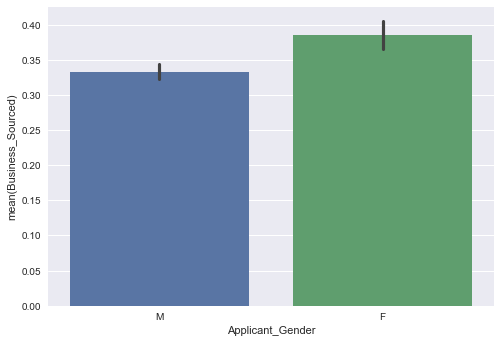

In [24]:
sns.barplot(df.Applicant_Gender,df.Business_Sourced)

We can not deny the fact that age and experience matter a lot in success of any candidate. So, we will exmaine the effect of age of applicant.

In [25]:
#trying to find the age. may be it can signify experience.
df['Applicant_BirthDate'] = pd.to_datetime(df.Applicant_BirthDate)

In [26]:
df['Application_Receipt_Date'] = pd.to_datetime(df.Application_Receipt_Date)

In [27]:
       df['Applicant_Age']           = -df['Applicant_BirthDate'].dt.year + df['Application_Receipt_Date'].dt.year

In [28]:
df.Applicant_Age.describe()

count    9454.000000
mean       32.534060
std        10.324947
min        16.000000
25%        25.000000
50%        30.000000
75%        38.000000
max        77.000000
Name: Applicant_Age, dtype: float64

In [29]:
age_bins = [15,20,25,30,35,40,45,50,55,60,65,70,75,80]
df['Applicant_Age'] = pd.cut(df['Applicant_Age'],age_bins)

In [30]:
df['Applicant_Age']

0       (35, 40]
1       (20, 25]
2       (40, 45]
3       (15, 20]
4       (20, 25]
5       (15, 20]
6       (35, 40]
7       (20, 25]
8       (30, 35]
9       (20, 25]
10      (25, 30]
11      (15, 20]
12      (25, 30]
13      (25, 30]
14      (25, 30]
15      (20, 25]
16      (20, 25]
17      (20, 25]
18      (25, 30]
19      (20, 25]
20      (15, 20]
21      (20, 25]
22      (20, 25]
23      (40, 45]
24      (20, 25]
25      (25, 30]
26      (20, 25]
27      (20, 25]
28      (20, 25]
29      (30, 35]
          ...   
9497    (40, 45]
9498    (25, 30]
9499    (40, 45]
9500    (25, 30]
9501    (30, 35]
9502    (45, 50]
9503    (30, 35]
9504    (30, 35]
9505    (25, 30]
9506    (20, 25]
9507    (20, 25]
9508    (25, 30]
9509    (20, 25]
9510    (35, 40]
9511    (25, 30]
9512    (25, 30]
9513    (25, 30]
9514    (25, 30]
9515    (35, 40]
9516    (30, 35]
9517    (25, 30]
9518    (25, 30]
9519    (40, 45]
9520    (20, 25]
9521    (35, 40]
9522    (35, 40]
9523    (50, 55]
9524    (30, 3

In [31]:
ser15 = df['Business_Sourced'].groupby(by=df.Applicant_Age).sum()

In [32]:
ser16 = df['dummy1'].groupby(by=df.Applicant_Age).sum()

In [33]:
ser17=ser16-ser15 

In [34]:
ser18 = ser17/ser16

In [35]:
ser18

Applicant_Age
(15, 20]    0.666667
(20, 25]    0.670471
(25, 30]    0.674720
(30, 35]    0.670910
(35, 40]    0.652318
(40, 45]    0.610482
(45, 50]    0.633333
(50, 55]    0.624339
(55, 60]    0.502347
(60, 65]    0.459119
(65, 70]    0.623188
(70, 75]    0.692308
(75, 80]    0.500000
dtype: float64

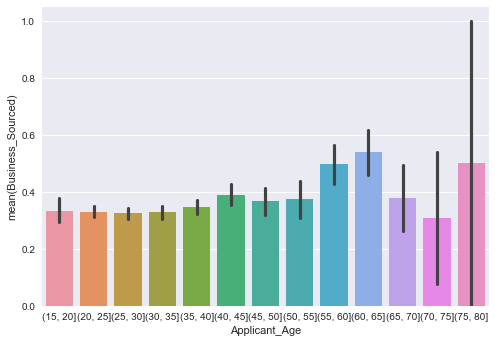

In [36]:
sns.barplot(df.Applicant_Age,df.Business_Sourced)

Marital status generally contributes to the number of hours a person can put in his/her job. Next, we will exmaine the effect of marital status of candidates on conversion rate.

In [37]:
#lets see if marital status matters or not
pd.crosstab(df.Applicant_Marital_Status,[df.Business_Sourced,df.dummy1],margins=True)

Business_Sourced,0,1,All
dummy1,1,1,
Applicant_Marital_Status,,,
D,2,2,4
M,4021,2156,6177
S,2161,1106,3267
W,3,3,6
All,6187,3267,9454


clearly, the conversion rate in married agents is 0.35 and that in single ones is 34%. so this factor is not affecting that much. 
It can be seen in bar plot too.

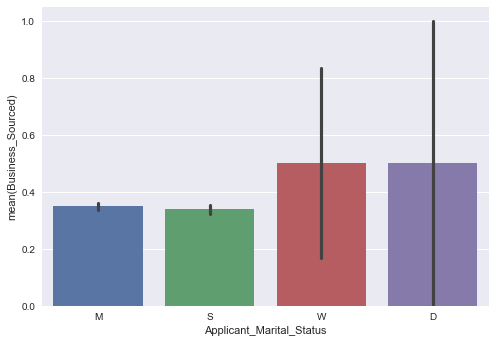

In [38]:
sns.barplot(df.Applicant_Marital_Status,df.Business_Sourced)

Eductaion is a primary factor in success of an applicant. Let's see whether it matters in our case or not.

In [39]:
pd.crosstab(df.Applicant_Qualification,[df.Business_Sourced,df.dummy1],margins=True)

Business_Sourced,0,1,All
dummy1,1,1,
Applicant_Qualification,,,
Associate / Fellow of Institute of Chartered Accountans of India,2,1,3
Associate/Fellow of Acturial Society of India,1,0,1
Associate/Fellow of Institute of Company Secretories of India,1,0,1
Associate/Fellow of Insurance Institute of India,0,1,1
Certified Associateship of Indian Institute of Bankers,0,1,1
Class X,159,66,225
Class XII,3893,1913,5806
Graduate,2000,1196,3196


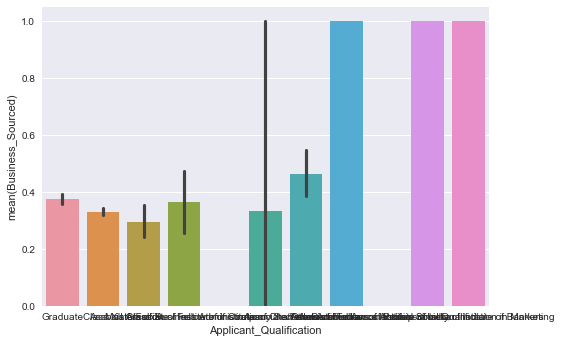

In [40]:
sns.barplot(df.Applicant_Qualification,df.Business_Sourced)

We will neglect the rows with values which are very small. conversion rate for classX pass is 0.3, for class XII 0.3,for graduates 0.38,for MBA 0.37 and others a whooping 0.46. After all rate is 0.34. 
so the company should focus on hiring graduates, MBA and try to look into what are the qualities possesed by people falling in others category.


Experience of one's mentor or teacher contributes a lot towards his/her success. We will examine the experience of manager next.

In [41]:
df['Manager_DOJ'] = pd.to_datetime(df.Manager_DOJ)

In [42]:
df['Manager_Exp'] = -df['Manager_DOJ'].dt.year + df['Application_Receipt_Date'].dt.year

In [43]:
df['Manager_Exp']

0       2.0
1       2.0
2       1.0
3       4.0
4       1.0
5       1.0
6       4.0
7       1.0
8       3.0
9       5.0
10      3.0
11      1.0
12      3.0
13      3.0
14      1.0
15      2.0
16      5.0
17      1.0
18      1.0
19      1.0
20      0.0
21      3.0
22      4.0
23      1.0
24      NaN
25      1.0
26      4.0
27      1.0
28      1.0
29      1.0
       ... 
9497    NaN
9498    NaN
9499    0.0
9500    0.0
9501    0.0
9502    4.0
9503    5.0
9504    0.0
9505    0.0
9506    5.0
9507    0.0
9508    0.0
9509    0.0
9510    NaN
9511    0.0
9512    0.0
9513    1.0
9514    NaN
9515    0.0
9516    0.0
9517    0.0
9518    0.0
9519    2.0
9520    NaN
9521    2.0
9522    0.0
9523    NaN
9524    2.0
9525    0.0
9526    NaN
Name: Manager_Exp, Length: 9527, dtype: float64

In [44]:
pd.crosstab(df.Manager_Exp,[df.Business_Sourced,df.dummy1],margins=True)

Business_Sourced,0,1,All
dummy1,1,1,
Manager_Exp,,,
0.0,2030,1231,3261
1.0,1886,812,2698
2.0,504,251,755
3.0,407,172,579
4.0,504,267,771
5.0,251,153,404
6.0,186,117,303
7.0,45,28,73


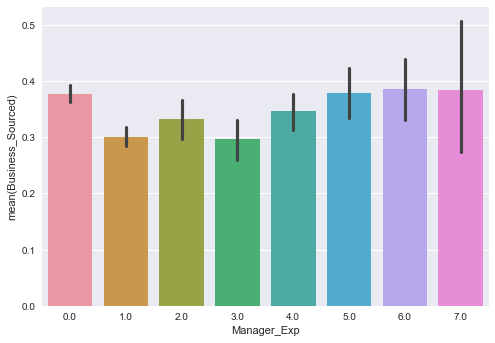

In [45]:
sns.barplot(df.Manager_Exp,df.Business_Sourced)

conversion rate for 0 year exp. is 0.38, for 1 year 0.3,for 2 years 0.34, for 3 years 0.29, for 4 years 0.35, for 5 years 0.38, for 6 years 0.39 and for 7 years 0.39. If we treat freshers as outliers, then we can see that as the experience is growing the conversion rate is growing. Also, reason behind freshers performing outstanding can be that the freshers are taking the opportunity as 

In [46]:
pd.crosstab(df.Manager_Exp,[df.Manager_Num_Coded,df.Manager_Num_Application],margins=True)

Manager_Num_Coded         0.0                                            ...   \
Manager_Num_Application   0.0   1.0  2.0  3.0  4.0  5.0 6.0 7.0 8.0 9.0  ...    
Manager_Exp                                                              ...    
0.0                      1547   285  236  174   97   90  39  10  11   4  ...    
1.0                       392   298  197  111   69   39  10   7   0   0  ...    
2.0                       135   112   55   28   16    4   3   1   1   0  ...    
3.0                       177    96   49   38   13    5   2   0   1   0  ...    
4.0                       207   130   64   36   16    5   3   0   0   0  ...    
5.0                       100    68   46   17    5    3   0   0   1   0  ...    
6.0                        67    60   25   14   12    0   3   0   0   0  ...    
7.0                        14    15    7    3    1    2   5   0   0   0  ...    
All                      2639  1064  679  421  229  148  65  18  14   4  ...    

Manager_Num_Coded       7.0     8.0               9.0             All  
Manager_Num_Application 6.0 7.0 4.0 8.0 10.0 11.0 4.0 10.0 11.0        
Manager_Exp                                                            
0.0                       0   0   3   0    0    0   2    1    1  3261  
1.0                       0   1   0   0    1    1   0    0    0  2698  
2.0                       0   1   0   0    0    0   0    0    0   755  
3.0                       0   0   0   0    0    0   0    0    0   579  
4.0                       0   0   0   0    0    0   0    0    0   771  
5.0                       0   0   0   0    0    0   0    0    0   404  
6.0                       2   0   0   1    0    0   0    0    0   303  
7.0                       0   0   0   0    0    0   0    0    0    73  
All                       2   2   3   1    1    1   2    1    1  8844  

[9 rows x 99 columns]

clearly, as the manager experience is increasing number of applications are decreasing drastically. The possible reason can be that as the experience increases, the manager becomes more and more choosy and people are afraid to get rejected.

In [47]:
df.Manager_Business.groupby(df['Manager_Exp']).mean()

Manager_Exp
0.0     28496.496780
1.0    217240.549666
2.0    336422.723179
3.0    263472.987910
4.0    281777.945525
5.0    364161.183168
6.0    441156.772277
7.0    643046.273973
Name: Manager_Business, dtype: float64

In [48]:
df.Manager_Num_Products.groupby(df['Manager_Exp']).mean()

Manager_Exp
0.0     0.960135
1.0     8.290586
2.0    12.373510
3.0    13.457686
4.0    13.258106
5.0    13.539604
6.0    12.673267
7.0    14.931507
Name: Manager_Num_Products, dtype: float64

From the table, it is clear that as the experience of a manager has grown more than 4 years, the business sourced by him/her has grown exponentially. Also remember that more experienced managers got less number of applications and shown higher rates of conversion. It clearly indicates that company should try to retain the managers who have got 4-5 years of experience with it.So is the trend for number of products sold.

Next, we will examine the effect of marital status on success of male and female applicants separately.

In [49]:
pd.crosstab([df.Applicant_Marital_Status,df.Applicant_Gender],[df.Business_Sourced,df.dummy1],margins=True)

Business_Sourced                              0     1   All
dummy1                                        1     1      
Applicant_Marital_Status Applicant_Gender                  
D                        F                    1     1     2
                         M                    1     1     2
M                        F                  897   571  1468
                         M                 3124  1585  4709
S                        F                  499   305   804
                         M                 1662   801  2463
W                        F                    3     2     5
                         M                    0     1     1
All                                        6187  3267  9454

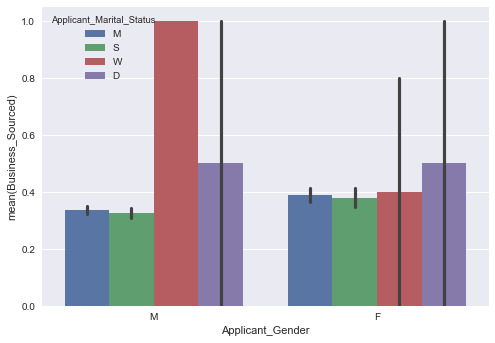

In [50]:
sns.barplot(df.Applicant_Gender,df.Business_Sourced,hue = df.Applicant_Marital_Status)

Here, we will focus on married and single only. the conversion rate of married male is 0.34,female 0.39. For single male 0.325 and for single female 0.38. Again, the stats show that married or unmarried is not that significant factor but females are converting more than males.

There is high probability that Manager_Business and Manager_Business2 will have high co-relation. Let's see if we are right. I will also examine other attributes of managers.

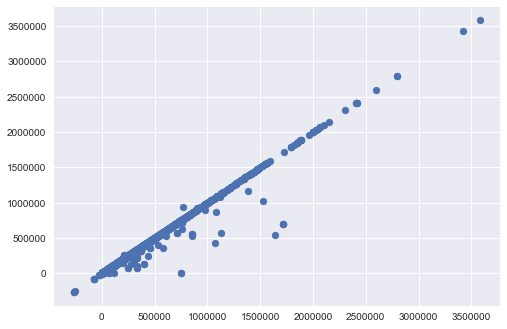

In [51]:
plt.scatter(df.Manager_Business,df.Manager_Business2)

the plot shows that both the columns are highly correlated. So i am not considering manager_business2 column.

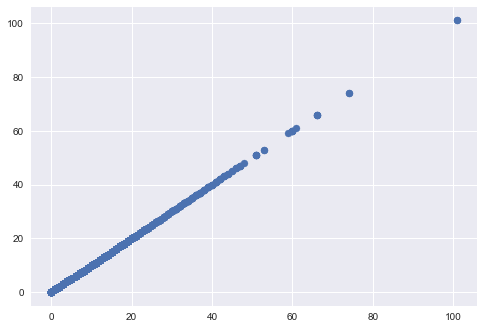

In [52]:
plt.scatter(df.Manager_Num_Products,df.Manager_Num_Products)

again the same case


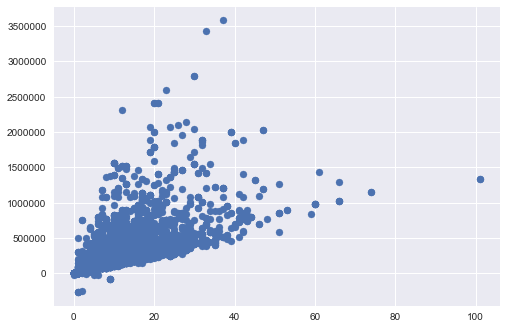

In [53]:
plt.scatter(df.Manager_Num_Products,df.Manager_Business)

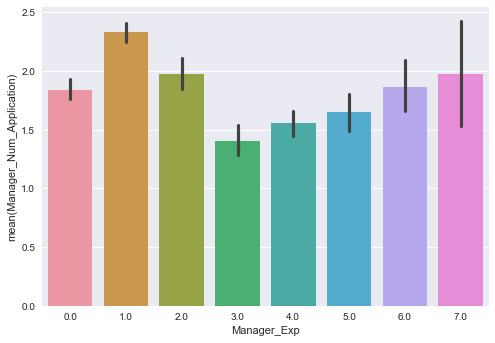

In [54]:
sns.barplot(df.Manager_Exp,df.Manager_Num_Application)

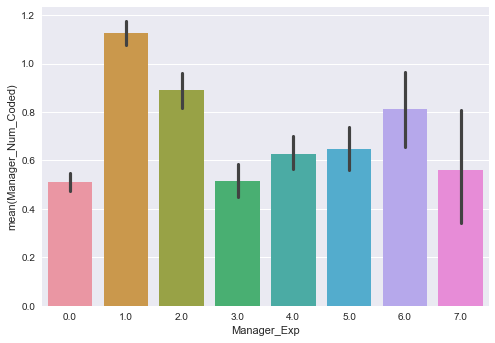

In [55]:
sns.barplot(df.Manager_Exp,df.Manager_Num_Coded)

Let's see whether the business of the company flourishes in a particular time of year or is independent of time of year.


In [56]:
df['Application_Receipt_Month'] =  df.Application_Receipt_Date.dt.month

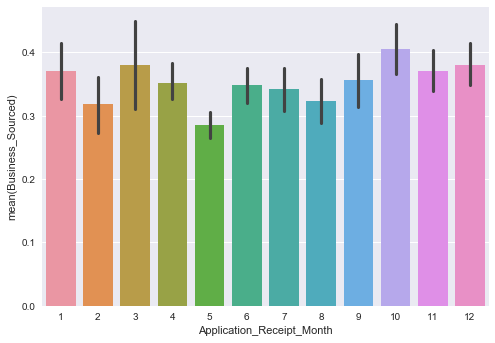

In [57]:
sns.barplot(df.Application_Receipt_Month,df.Business_Sourced)

Recruitments in may perform really poor. On the other hand, months like october and december perform better than others.

I am assuming that first 2 digits of a PIN signify a state which is true in case of Indian PIN system. Let's examine the effect of state on success rate of applicants.

In [58]:
list0 = []
for i in range(11,100):
    list0.append(i*10000)

In [59]:
df['Applicant_city_Bins'] = pd.cut(df.Applicant_City_PIN,list0)

In [60]:
ser30 = df['dummy1'].groupby(df.Applicant_city_Bins).sum()

In [61]:
ser31 = df['Business_Sourced'].groupby(df.Applicant_city_Bins).sum()

In [62]:
ser32 = -ser31+ser30

In [63]:
ser33 = ser32/ser30
ser33
ser33.ix[ser33>0.7]

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  This is separate from the ipykernel package so we can avoid doing imports until


Applicant_city_Bins
(110000, 120000]    0.744604
(120000, 130000]    0.725714
(130000, 140000]    0.800000
(150000, 160000]    1.000000
(190000, 200000]    1.000000
(200000, 210000]    0.701188
(220000, 230000]    0.724315
(260000, 270000]    0.875000
(280000, 290000]    0.751701
(310000, 320000]    1.000000
(340000, 350000]    1.000000
(380000, 390000]    0.746835
(390000, 400000]    0.720000
(430000, 440000]    0.731343
(580000, 590000]    1.000000
(610000, 620000]    1.000000
(620000, 630000]    0.866667
(630000, 640000]    0.923077
(640000, 650000]    0.933333
(740000, 750000]    0.896552
(760000, 770000]    0.909091
(800000, 810000]    0.711370
(810000, 820000]    0.704348
(820000, 830000]    0.752941
dtype: float64

In the above table, we have cities whose conversion rate is pretty high. Also we can change the thershhold if required.

In [64]:
import pandas as pd
df = pd.read_csv("C:/Users/HP/Desktop/hackathon/Train_pjb2QcD.csv")

Let's see whether Gender of manager and his/her status affects his/her business or not.

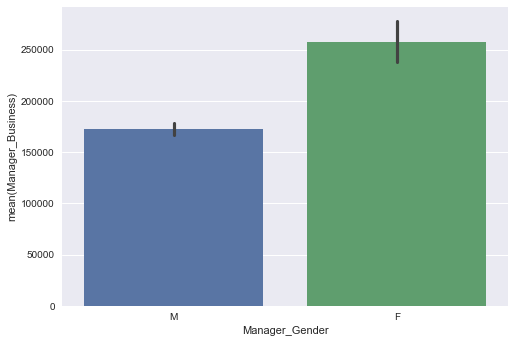

In [65]:
sns.barplot(df.Manager_Gender,df.Manager_Business)

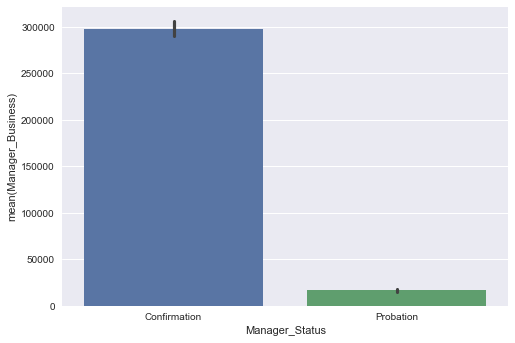

In [66]:
sns.barplot(df.Manager_Status,df.Manager_Business)

History of an applicant affects his/her convincing capabilities. Let's see whether or not it is true in our case.  

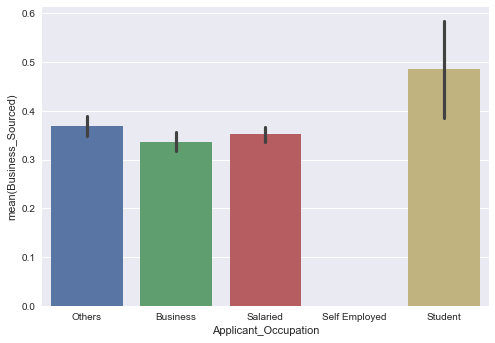

In [67]:
sns.barplot(df.Applicant_Occupation,df.Business_Sourced)

In [68]:
# This is to cross check whether number of candiadtes in a particular class is sufficient to make inference.
pd.value_counts(df.Applicant_Occupation)

Salaried         3787
Business         2303
Others           1966
Self Employed     149
Student           101
Name: Applicant_Occupation, dtype: int64

In [69]:
df.shape

(9527, 23)

In [70]:
df.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,4/16/2007,844120.0,M,12/19/1971,M,Others,Graduate,11/10/2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,4/16/2007,844111.0,M,2/17/1983,S,Others,Class XII,11/10/2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,4/16/2007,844101.0,M,1/16/1966,M,Business,Class XII,5/27/2006,...,Confirmation,M,3/3/1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,FIN1000004,814112,4/16/2007,814112.0,M,2/3/1988,S,Salaried,Class XII,8/21/2003,...,Confirmation,F,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,FIN1000005,814112,4/16/2007,815351.0,M,7/4/1985,M,Others,Class XII,5/8/2006,...,Confirmation,M,2/7/1971,2.0,1.0,230402.0,17.0,230402.0,17.0,0


In [71]:
df.isnull().sum()

ID                                0
Office_PIN                        0
Application_Receipt_Date          0
Applicant_City_PIN               97
Applicant_Gender                 67
Applicant_BirthDate              73
Applicant_Marital_Status         73
Applicant_Occupation           1221
Applicant_Qualification          86
Manager_DOJ                     683
Manager_Joining_Designation     683
Manager_Current_Designation     683
Manager_Grade                   683
Manager_Status                  683
Manager_Gender                  683
Manager_DoB                     683
Manager_Num_Application         683
Manager_Num_Coded               683
Manager_Business                683
Manager_Num_Products            683
Manager_Business2               683
Manager_Num_Products2           683
Business_Sourced                  0
dtype: int64

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
from sklearn.cross_validation import train_test_split

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [74]:
from sklearn import metrics

In [75]:
 df.drop(['ID','Office_PIN','Application_Receipt_Date','Applicant_City_PIN','Applicant_BirthDate','Manager_DOJ','Manager_DOJ'],axis=1,inplace=True)

In [76]:
df.drop('Manager_DoB',inplace=True,axis=1)

In [77]:
df.isnull().sum()

Applicant_Gender                 67
Applicant_Marital_Status         73
Applicant_Occupation           1221
Applicant_Qualification          86
Manager_Joining_Designation     683
Manager_Current_Designation     683
Manager_Grade                   683
Manager_Status                  683
Manager_Gender                  683
Manager_Num_Application         683
Manager_Num_Coded               683
Manager_Business                683
Manager_Num_Products            683
Manager_Business2               683
Manager_Num_Products2           683
Business_Sourced                  0
dtype: int64

In [78]:
df.Manager_Business.fillna(df.Manager_Business.mean(),inplace=True)

In [79]:
df.Manager_Business2.fillna(df.Manager_Business2.mean(),inplace=True)

In [80]:
df.Manager_Num_Coded.fillna(df.Manager_Num_Coded.median(),inplace=True)

In [81]:
df.Manager_Num_Products.fillna(df.Manager_Num_Products.median(),inplace=True)

In [82]:
df.Manager_Num_Products2.fillna(df.Manager_Num_Products2.median(),inplace=True)

In [83]:
df.Manager_Grade.fillna(df.Manager_Grade.median(),inplace=True)

In [84]:
df.Manager_Num_Application.fillna(df.Manager_Num_Application.median(),inplace=True)

In [85]:
df.head()

,Applicant_Gender,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,M,M,Others,Graduate,Level 1,Level 2,3.0,Confirmation,M,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,M,S,Others,Class XII,Level 1,Level 2,3.0,Confirmation,M,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,M,M,Business,Class XII,Level 1,Level 1,2.0,Confirmation,M,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,M,S,Salaried,Class XII,Level 1,Level 3,4.0,Confirmation,F,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,M,M,Others,Class XII,Level 1,Level 1,2.0,Confirmation,M,2.0,1.0,230402.0,17.0,230402.0,17.0,0


In [86]:
df=pd.get_dummies(df,['Applicant_Marital_Status','Applicant_Gender','Applicant_Occupation','Applicant_Qualification','Manager_Joining_Designation','Manager_Current_Designation','Manager_Grade','Manager_Status'],drop_first=True)

In [87]:
labels = df['Business_Sourced']

In [88]:
df.drop('Business_Sourced',axis=1,inplace=True)

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
X1_train, X1_cv, Y_train, Y_cv = train_test_split(df,labels, test_size = 0.2, random_state = 56)


In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
model = LogisticRegression()

In [93]:
model.fit(X1_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [94]:
df=StandardScaler().fit_transform(df)

In [95]:
X1_train, X1_cv, Y_train, Y_cv = train_test_split(df,labels, test_size = 0.2, random_state = 56)


In [96]:
model1=LogisticRegression()
model1.fit(X1_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [97]:
from sklearn.metrics import accuracy_score

In [98]:
accuracy_score(Y_cv,model.predict(X1_cv))

0.48478488982161594

In [99]:
accuracy_score(Y_cv,model1.predict(X1_cv))

0.6568730325288562

In [100]:
Y_cv.value_counts()

0    1259
1     647
Name: Business_Sourced, dtype: int64

In [101]:
1259/1906


0.6605456453305352

In [102]:
Y_train.value_counts()

0    5001
1    2620
Name: Business_Sourced, dtype: int64

In [103]:
2620/(2620+5001)

0.3437869046056948

In [104]:
from sklearn import tree

In [105]:
clf = tree.DecisionTreeClassifier()

In [106]:
clf.fit(X1_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [107]:
accuracy_score(Y_cv,clf.predict(X1_cv))

0.57345225603357819

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
model_forest = RandomForestClassifier(n_estimators=100,max_depth=15,max_leaf_nodes=15,min_samples_leaf=1,min_samples_split=5,n_jobs=2)

In [110]:
model_forest.fit(X1_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=15,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=2, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [111]:
accuracy_score(Y_cv,model_forest.predict(X1_cv))

0.65949632738719832

In [112]:
accuracy_score(Y_train,model_forest.predict(X1_train))

0.65975593754100514

In [113]:
from sklearn.ensemble import AdaBoostClassifier

In [114]:
model_ada = AdaBoostClassifier(n_estimators=50,learning_rate=0.5)

In [115]:
model_ada.fit(X1_train,Y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.5, n_estimators=50, random_state=None)

In [116]:
accuracy_score(Y_train,model_ada.predict(X1_train))

0.66224904868127543

In [117]:
accuracy_score(Y_cv,model_ada.predict(X1_cv))

0.65634837355718778

In [118]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model_gbm = GradientBoostingClassifier(learning_rate=1,max_depth=4)

In [ ]:
model_gbm.fit(X1_train,Y_train)

In [ ]:
accuracy_score(Y_train,model_gbm.predict(X1_train))

In [ ]:
accuracy_score(Y_cv,model_gbm.predict(X1_cv))